# Heuristic Models For Seattle Weather

In [1]:
# import packges 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import random
from random import randint
import datetime
from sklearn.metrics import mean_squared_error

In [2]:
# Load Data
df = pd.read_csv('https://raw.githubusercontent.com/Yasmeenmad/data_science_bootcamp/main/Week10/Intro_Machine_Learning1/seattle_weather_1948-2017.csv')

In [3]:
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


### Create functions to handle NaN values

In [4]:
def RAIN_INSERTION(cols):
    """
    Insert False where NaN values are present
    """
    RAIN=cols[0]
    if pd.isnull(RAIN):
        return False
    else:
        return RAIN

In [5]:
def PRCP_INSERTION(col):
    """
    Insert the Mean of PRCP where NaN values are present
    """
    PRCP=col[0]
    if pd.isnull(PRCP):
        return df['PRCP'].mean()
    else:
        return PRCP

In [6]:
# Apply the functions
df['RAIN']=df[['RAIN']].apply(RAIN_INSERTION,axis=1)

In [7]:
df['PRCP']=df[['PRCP']].apply(PRCP_INSERTION,axis=1)

In [8]:
# Check for NaN values
df[pd.isnull(df['RAIN'])]

,DATE,PRCP,TMAX,TMIN,RAIN


In [9]:
df[pd.isnull(df['PRCP'])]

,DATE,PRCP,TMAX,TMIN,RAIN


## Identifying Outliers

In [10]:
# First quartile (Q1)
Q1 = np.percentile(df['TMAX'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(df['TMAX'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

# lower bound outliers --> Q1 - 1.5(IQR)
# higher bound outliers --> Q3 + 1.5 (IQR)


print(Q3+ 1.5*(IQR))

97.5


In [11]:
#Dropping the outliers from TMIN column
df=df.drop(df[df['TMIN']<17 ].index)


In [12]:
#Dropping the outliers from TMAX columns i.e. the value more than 100
df=df.drop(df[(df['TMAX']>97.5) | (df['TMAX']< 21.5)].index)


In [13]:
#Dropping the outliers from PRCP columns i.e. the value more than 0.275
df=df.drop(df[(df['PRCP']>0.25) | (df['PRCP']< -0.15) ].index)

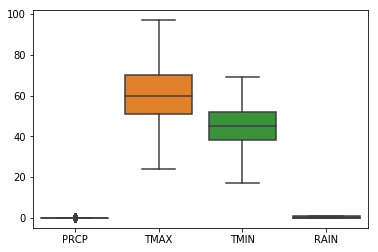

In [14]:
sns.boxplot(data=df)

In [15]:
# Reset index and drop index column
df = df.reset_index().drop("index", axis=1)

### The first heuristic model 
conditions:
- If it rained yesterday and today is raining then will predict a rain precipitation from 0.02 to 0.08 
- If If it didn't rain yesterday and today is raining then will predict a rain precipitation from 0.01 to 0.02 

In [16]:
# Create function to perform our heuristic
def heuristic(df):
    
    """
    Simple heuristic:
    If it rained yesterday and today is raining then will predict a rain precipitation from 0.02 to 0.08
    If If it didn't rain yesterday and today is raining then will predict a rain precipitation from 0.01 to 0.02
    
    """
    
    preds = []
    for x in range(len(df)):
        # If first two rows then predict false
        if x <2:
            preds.append(0)
        else:
            if ((df["RAIN"].iloc[x] == True) & (df["RAIN"].iloc[x-1] == False)):
                precipitation = round((float(random.randint(100,200)) / 10000),2)
                preds.append(precipitation)
            
            elif ((df["RAIN"].iloc[x] == True) & (df["RAIN"].iloc[x-1] == True)):
                precipitation = round((float(random.randint(200,800)) / 10000),2)
                preds.append(precipitation)
            
            elif ((df["RAIN"].iloc[x] == True) & (df["RAIN"].iloc[x-1] == True) & ( df["RAIN"].iloc[x-2] == True)):
                precipitation = round((float(random.randint(1000,1500)) / 10000),2)
                preds.append(precipitation)
   
            else:
                # Predict 0 if the above is not true
                preds.append(0)
    return preds

# Apply Heuristic
df["preds"] = heuristic(df)

### The heuristic mean model 

In [17]:
# Create function to perform our heuristic
def heuristic_mean(df):
    
    """
    Simple heuristic:
    
    If it rained yesterday or the day before, if max temperature from 30 to 70 for yesterday or the day before, if min 
    temperature from 25 to 60 for yesterday or the day before and if precipitation of rain range from 0.01 to 5.02 
    for yesterday or the
    day before then it will rain else predict no rain
    
    Frist two rows are predicted false be default
    """
    
    preds_mean = []
    for x in range(len(df)):
        # If first two rows then predict false
        if x <2:
            preds_mean.append(0)
        else:

            if (df["RAIN"].iloc[x] == True):
                precipitation = round(df['PRCP'].mean(),2)
                preds_mean.append(precipitation)

               
            else:
                # Predict false if the above is not true
                preds_mean.append(0)
    return preds_mean

# Apply Heuristic
df["preds_mean"] = heuristic_mean(df)

### The first heuristic model accuracy

In [18]:
# Create a Function to Calculate Accuracy
def accuracy(col1,col2):
    return ((np.sum(col1 == col2))/len(df))

In [19]:
accuracy(df['PRCP'],df['preds'])

0.6941488146896269

### The first heuristic model Mean Squared Error

In [20]:
mean_squared_error(df['PRCP'],df['preds'])

0.002864520581874091

### The heuristic model mean accuracy

In [21]:
accuracy(df['PRCP'],df['preds_mean'])

0.6877997533458183

#### Did you do better than predicting the mean value for the PRCP column?
yes I did